In [ ]:


import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "tumor_data"

  # Unzip pizza, steak, sushi data
with zipfile.ZipFile("archive.zip", "r") as zip_ref:
  print("Unzipping tumor data...")
  zip_ref.extractall(image_path)

Unzipping tumor data...


In [ ]:
from torchvision import transforms

simple_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
from helper_functions import accuracy_fn

In [2]:
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

random.seed(42)
train_data_path = image_path / "Brain Tumor Detection/train"
test_data_path = image_path / "Brain Tumor Detection/test"

train_path_list = list(train_data_path.glob("*/*.jpg"))
test_path_list = list(test_data_path.glob("*/*.jpg"))



TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [ ]:
labels_0=[]
imgs_0 = []
for i in range(2):
    random_idx = random.sample(range(len(test_path_list)),1)
    random_img_path =test_path_list[random_idx[0]]
    #random_img_path =test_path_list[i]

    img = Image.open(random_img_path)

    random_label_path = str(random_img_path).replace('images','labels')
    random_label_path = random_label_path.replace('.jpg','.txt')
    with open(random_label_path,'r') as f:
      lines=f.readlines()
      try:
        label = int(lines[0].strip()[0])
        #for lineNo in range(len(a)):
        labels_0.append(label)
        imgs_0.append(simple_transform(img))


      except(ValueError, IndexError) as e:
        print(f"Error processing line in file {random_label_path}: {lines}")
        print(f"Error details: {e}")

In [ ]:
def load_custom_dataset(image_path_list, transform):
  labels=[]
  imgs = []
  for i in range(len(image_path_list)):
    #random_idx = random.sample(range(len(image_path_list)),1)
    #random_img_path =image_path_list[random_idx[0]]
    random_img_path =image_path_list[i]

    img = Image.open(random_img_path)

    random_label_path = str(random_img_path).replace('images','labels')
    random_label_path = random_label_path.replace('.jpg','.txt')
    with open(random_label_path,'r') as f:
      lines=f.readlines()
      try:
        label = int(lines[0].strip()[0])
        #for lineNo in range(len(a)):
        labels.append(label)
        imgs.append(transform(img))


      except(ValueError, IndexError) as e:
        print(f"Error processing line in file {random_label_path}: {lines}")
        print(f"Error details: {e}")
        # do nothing
  return imgs, labels


'''
plt.figure()
for i in range(len(labels)):
    img_matplot = np.asarray(imgs[i])
    #print(len(labels))


    #print(img_matplot.shape)
    plt.subplot(1,10,i+1)
    #print(str(labels[i]))
    plt.title(str(labels[i]))
    plt.imshow(img_matplot)
    plt.axis('off')
    #plt.imshow(img)
    #len(image_path_list)'''


"\nplt.figure()\nfor i in range(len(labels)):\n    img_matplot = np.asarray(imgs[i])\n    #print(len(labels))\n\n\n    #print(img_matplot.shape)\n    plt.subplot(1,10,i+1)\n    #print(str(labels[i]))\n    plt.title(str(labels[i]))\n    plt.imshow(img_matplot)\n    plt.axis('off')\n    #plt.imshow(img)\n    #len(image_path_list)"

In [ ]:
test_imgs, test_labels = load_custom_dataset(test_path_list, simple_transform)
train_imgs, train_labels = load_custom_dataset(train_path_list, simple_transform)

Error processing line in file data/tumor_data/Brain Tumor Detection/test/labels/volume_253_slice_91_jpg.rf.fef2a8a552be1c39a87b393aa50c521a.txt: []
Error details: list index out of range
Error processing line in file data/tumor_data/Brain Tumor Detection/test/labels/volume_228_slice_30_jpg.rf.7179b33ef6dc35067dd19e043f607127.txt: []
Error details: list index out of range
Error processing line in file data/tumor_data/Brain Tumor Detection/test/labels/volume_132_slice_139_jpg.rf.cd986d8ea8f66556e30dc654f9dbc429.txt: []
Error details: list index out of range
Error processing line in file data/tumor_data/Brain Tumor Detection/test/labels/volume_28_slice_74_jpg.rf.65c1dc61959ded041101450e15610d44.txt: []
Error details: list index out of range
Error processing line in file data/tumor_data/Brain Tumor Detection/test/labels/volume_12_slice_89_jpg.rf.addb37f935c5dbfb4b250c20b9c0ec2e.txt: []
Error details: list index out of range
Error processing line in file data/tumor_data/Brain Tumor Detectio

In [ ]:
len(train_imgs)

6851

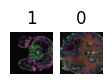

In [ ]:
plt.figure()
for i in range(2):
    img_matplot = (test_imgs[i]).permute(1,2,0)
    #print(len(labels))


    #print(img_matplot.shape)
    plt.subplot(1,10,i+1)
    #print(str(labels[i]))
    plt.title(str(test_labels[i]))
    plt.imshow(img_matplot)
    plt.axis('off')
    #plt.imshow(img)
    #len(image_path_list)'''

In [ ]:
import torch
from torchvision import datasets

class Custom_DataSet(torch.utils.data.Dataset):
  def __init__(self, images, labels):
    self.images = images
    self.labels = labels

  def __len__(self):
    return len(self.images)

  def __getitem__(self, index):
    return self.images[index], self.labels[index]


(-0.5, 223.5, 223.5, -0.5)

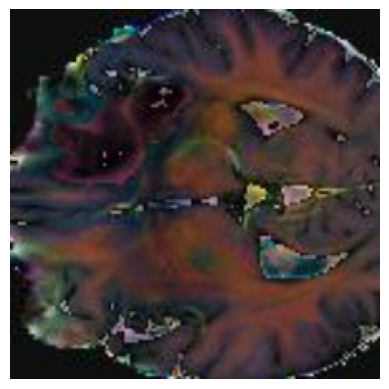

In [ ]:
test_set = Custom_DataSet(test_imgs, test_labels);

plt.imshow(test_set.images[1].permute(1,2,0))
plt.axis('off')

In [ ]:
from torch.utils.data import DataLoader
import os

test_set = Custom_DataSet(test_imgs, test_labels);
train_set = Custom_DataSet(train_imgs, train_labels);


train_dataloader = DataLoader(dataset = train_set,
                              batch_size=32,
                              shuffle = True,
                              num_workers = os.cpu_count())

test_dataloader = DataLoader(dataset = test_set,
                              batch_size=32,
                              shuffle = False,
                              num_workers = os.cpu_count())


In [ ]:
len(test_set)

973

In [ ]:
#model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18',pretrained = True)

In [ ]:
#model


In [ ]:
from torch import nn
def train_step(model = nn.Module,
               dataloader = torch.utils.data.DataLoader,
               loss_fn = torch.nn.Module,
               optimizer = torch.optim.Optimizer,
               device = torch.device
               ):
  model.train()
  train_loss=0
  train_acc =0
  for batch, (X,y) in enumerate(dataloader):
      X,y = X.to(device), y.to(device)
      train_logits = model(X)
      loss = loss_fn(train_logits,y)

      optimizer.zero_grad()

      loss.backward()
      train_loss += loss.item()


      optimizer.step()


      #train_pred = torch.argmax(torch.softmax(train_logits,dim =1),dim=1)
      #train_acc = (train_pred == y).sum().item() / len(train_logits)
      train_pred_class = torch.argmax(torch.softmax(train_logits, dim=1), dim=1)
      train_acc += (train_pred_class == y).sum().item()/len(train_logits)




  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)


  return train_loss, train_acc

In [ ]:
def test(model = nn.Module,
               dataloader = torch.utils.data.DataLoader,
               loss_fn = torch.nn.Module,
               device = torch.device
               ):
  model.eval()
  test_loss=0
  test_acc =0
  with torch.inference_mode():
    for batch, (X,y) in enumerate(dataloader):
        X,y = X.to(device), y.to(device)
        test_pred_logits = model(X)

        loss = loss_fn(test_pred_logits, y)

        test_loss += loss.item()
        #test_pred = torch.argmax(torch.softmax(test_logits,dim =1),dim=1)

        test_pred_labels = test_pred_logits.argmax(dim=1)
        #test_pred_class = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)
        test_acc += (test_pred_labels == y).sum().item()/len(test_pred_labels)
        #.sum().item() / len(test_logits)


  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)


  return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn = torch.nn.Module,
          optimizer = torch.optim.Optimizer,
          epochs = 1,
          device = torch.device
          ):
  results ={
      "train_loss" : [],
      "train_acc"  : [],
      "test_loss"  : [],
      "test_acc"   : []
  }
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer, device)
    test_loss, test_acc = test(model, test_dataloader, loss_fn, device)

    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f}  | Train Acc: {train_acc:.4f}  | Test loss: {test_loss:.4f}  | test Acc: {test_acc:.4f}")
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)


  return results

In [3]:
from torchvision import models
model = models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 113MB/s]


In [ ]:
model

In [ ]:
torch.manual_seed(42)

from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

classes_count = np.unique(train_labels)

for param in model.parameters():
  param.requires_grad = False

model.fc = nn.Linear(512, 3)
model.to(device)
#print(model)
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)



## UPDATIN THE FC layer to suit our goal



In [ ]:
np.unique(train_labels)


array([0, 1, 2])

In [ ]:
#model_3epoch = model
#model_3epoch_weights = torch.load('tumor_classification_3epochs.pt')
#model_3epoch.load_state_dict(model_3epoch_weights)

model_results = train(model = model,
                      train_dataloader = train_dataloader,
                      test_dataloader = test_dataloader,
                      loss_fn = loss_fn,
                      optimizer = optimizer,
                      epochs = 20,
                      device = device)


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.6449  | Train Acc: 0.6479  | Test loss: 0.5883  | test Acc: 0.7163
Epoch: 1 | Train loss: 0.5849  | Train Acc: 0.6967  | Test loss: 0.5806  | test Acc: 0.7163
Epoch: 2 | Train loss: 0.5739  | Train Acc: 0.7045  | Test loss: 0.5649  | test Acc: 0.7259
Epoch: 3 | Train loss: 0.5622  | Train Acc: 0.7125  | Test loss: 0.5793  | test Acc: 0.7244
Epoch: 4 | Train loss: 0.5582  | Train Acc: 0.7168  | Test loss: 0.5588  | test Acc: 0.7279
Epoch: 5 | Train loss: 0.5574  | Train Acc: 0.7170  | Test loss: 0.5645  | test Acc: 0.7289


In [ ]:
torch.save(model.state_dict(),'tumor_classification_3epochs.pt')



<All keys matched successfully>

In [ ]:
'''model_results = train(model = model,
                      train_dataloader = train_dataloader,
                      test_dataloader = test_dataloader,
                      loss_fn = loss_fn,
                      optimizer = optimizer,
                      epochs = 17,
                      device = device)'''


In [ ]:
'''try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model, input_size=[1, 3, 224, 224])'''